In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
# We load the MNIST dataset below
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

In [3]:
#Preprocessing 
np.random.seed(123)

indices = np.random.choice(70000,10000)
X = mnist.data[indices] / 255.0
y = mnist.target[indices]

print(X.shape, y.shape)

(10000, 784) (10000,)


In [4]:
#Initialize and fit dim reduct. method t-SNE
tsne= TSNE(n_components=2)

tsne_results= tsne.fit_transform(X)

In [5]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

ValueError: Image size of 91172x42381 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x360 with 1 Axes>

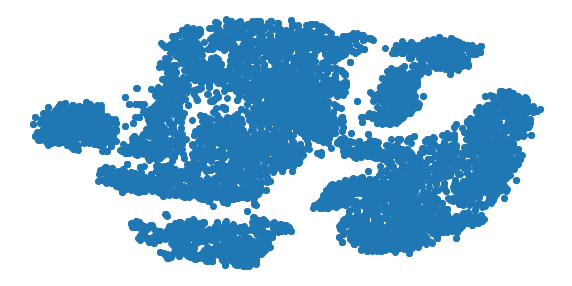

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

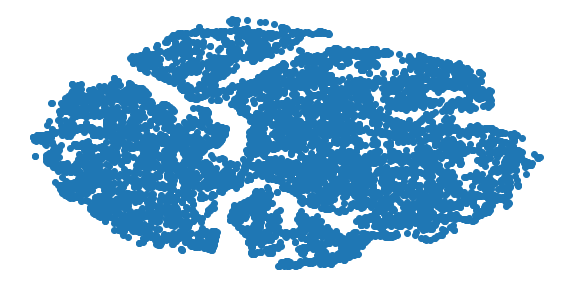

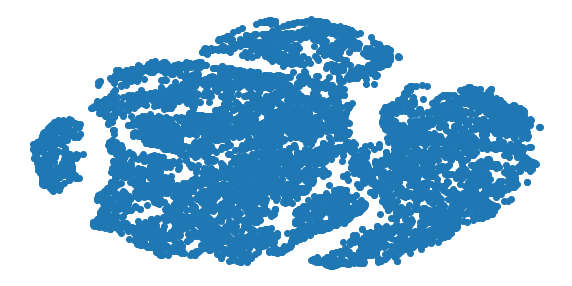

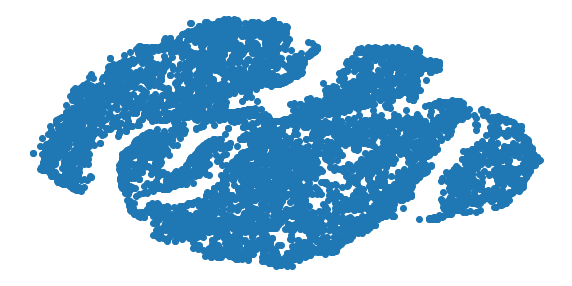

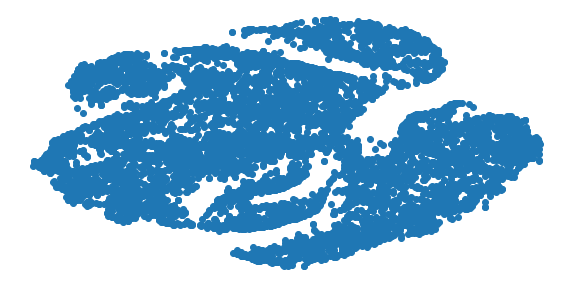

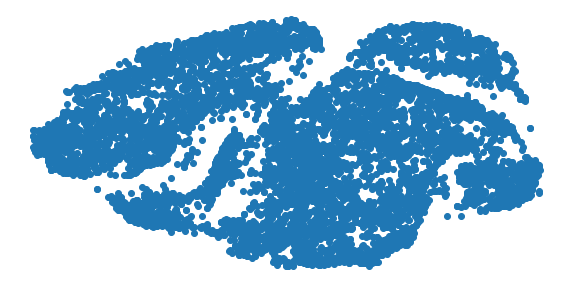

In [7]:
#Initialize  t-SNE with various perplexity values
tsne= TSNE(n_components=2)
tsne_results= tsne.fit_transform(X)

perplexities= range(10, 51, 10)

for i, perp in enumerate(perplexities):
    plt.figure(i, figsize=(10,5))
    tsne= TSNE(n_components=2, perplexity=perp, n_iter=300)
    tsne_results= tsne.fit_transform(X)
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

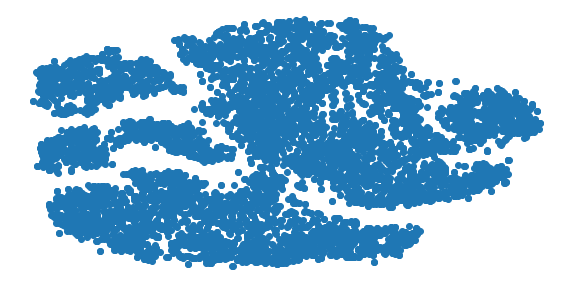

In [8]:
tsne= TSNE(n_components=2, perplexity=30, n_iter=500)
tsne_results= tsne.fit_transform(X)

plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

The t-SNE results produce more clearly separable clusters than PCA, but it is still difficult to determine specifics without labels/colors.